# Understand offense dispositions
- Where does the process end for VD? (Voluntary disposition by DA) which is >50% of cases...
- How does someone get the DA to dismiss their case?
- Which offenses get voluntary disposition by DA?
    - Are these the ones that collect bail and/or fines?
- Which people get voluntary disposition by DA?
- Which offenses got to **Judge**?
- Which dispositions mean a dismissal? (Just VD?) ***ASK A LAWYER***
- 

In [1]:
# I am blind without this
%config InlineBackend.figure_format = 'retina' 
import pandas as pd
# see all columns
pd.set_option("max_columns", None)

In [2]:
case_off = pd.read_csv(
    "/Users/clarissaache/Documents/Capstone/case_offense_v01.csv",
    low_memory=False,
    index_col=[0],
)
case_off


,case_id,key_county_num,key_county_num.1,key_century,key_year,court_type,def_street_address,def_city_address,def_state_address,def_zip_address,def_ext_zip_address,date_of_birth,race,sex,process_served,case_creation_date,process_service_date,case_trial_date,court_attorney_type,indictment_date,bond_type,bond_amount,in_jail_indicator,jail_release_date,jail_commited_date,arrest_date,domestic_violence,race_gender,CRRKEY,charged_offense_date,charged_offense_code,arraigned_offense_date,convicted_offense_code,plea_code,verdict_code,disposition,disposition_date,judge_code,min_sentence,max_sentence,min_sentence_frame,fines,restitution,probation_len,probation_frame,supervised_probation_flag,date to paid,monies_paid_flag,more_offense_check_flag,max_sentence_frame,domestic_violence_flag,active_sentence_ind,community_service_hr,offense_class,prior_record_points,judgement_file_number,judgement_file_offense_num,court_cost,min_sentence_day,max_sentence_day
0,1973006239,0,0,19,73,CRS,413 W GILBREATH ST,GRAHAM,NC,27253,NaN,7f69fac81ed85a6a41996f079cf9adcbd1ea89098e756a...,W,M,W,2013-10-22,1973-05-20,1974-05-09,R,1973-08-07,SEC,10000.0,NaN,NaN,NaN,NaN,NaN,White Male,000197300623900201001100,1973-05-20,3599,NaN,NaN,NaN,NaN,SI,1973-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1973006239,0,0,19,73,CRS,413 W GILBREATH ST,GRAHAM,NC,27253,NaN,7f69fac81ed85a6a41996f079cf9adcbd1ea89098e756a...,W,M,W,2013-10-22,1973-05-20,1974-05-09,R,1973-08-07,SEC,10000.0,NaN,NaN,NaN,NaN,NaN,White Male,000197300623900451001100,1973-05-20,3599,NaN,NaN,NaN,NaN,VD,2013-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1973007828,0,0,19,73,CRS,413 W GILBREATH ST,GRAHAM,NC,27253,NaN,7f69fac81ed85a6a41996f079cf9adcbd1ea89098e756a...,W,M,W,2013-10-22,1973-06-14,1974-05-09,R,1973-08-07,SEC,1.0,NaN,NaN,NaN,NaN,NaN,White Male,000197300782800201001100,1973-05-19,3599,NaN,NaN,NaN,NaN,SI,1973-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1973007828,0,0,19,73,CRS,413 W GILBREATH ST,GRAHAM,NC,27253,NaN,7f69fac81ed85a6a41996f079cf9adcbd1ea89098e756a...,W,M,W,2013-10-22,1973-06-14,1974-05-09,R,1973-08-07,SEC,1.0,NaN,NaN,NaN,NaN,NaN,White Male,000197300782800451001100,1973-05-19,3599,NaN,NaN,NaN,NaN,VD,2013-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1973013840,0,0,19,73,CRS,413 W GILBREATH ST,GRAHAM,NC,27253,NaN,7f69fac81ed85a6a41996f079cf9adcbd1ea89098e756a...,W,M,W,2013-10-22,1973-10-25,1974-05-09,R,1974-01-22,SEC,3000.0,NaN,NaN,NaN,NaN,NaN,White Male,000197301384000201001100,1973-10-13,3599,NaN,NaN,NaN,NaN,SI,1974-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039399,9902021700565,990,990,20,21,CR,12 BERLINS VW,CANDLER,NC,28715,NaN,af352bc1b3845c42bee724728ce17e1d9a8acbc2d0b211...,W,M,C,2021-06-29,2021-06-28,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White Male,990202170056500302001100,2021-06-28,4440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23039400,9902021700566,990,990,20,21,CR,80 VAUGHN LN,SPRUCE PINE,NC,28777,NaN,c6c82b3a6a13da8501d44699a81cce6cbc4730592a024f...,W,F,C,2021-06-29,2021-06-28,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White Female,990202170056600201001100,2021-06-28,4725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23039401,9902021700566,990,990,20,21,CR,80 VAUGHN LN,SPRUCE PINE,NC,28777,NaN,c6c82b3a6a13da8501d44699a81cce6cbc4730592a024f...,W,F,C,2021-06-29,2021-06-28,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White Fem

In [8]:
case_off.columns
case_off[
    [
        "charged_offense_date", #charged by the police
        "arraigned_offense_date", # either the same day or the day after arrested and charged, defendants are brought before a magistrate judge for an initial hearing on the case.
        "jail_commited_date",
        "jail_release_date",
        "process_service_date", # internal processing date?
        "case_creation_date", # internal case record creation date?
        "case_trial_date", # actual trial, if it happens 
        "indictment_date", # a formal charge or accusation 
        "disposition_date",
        "disposition",
    ]
].sample(3)

,charged_offense_date,arraigned_offense_date,jail_commited_date,jail_release_date,process_service_date,case_creation_date,case_trial_date,indictment_date,disposition_date,disposition
16518149,2007-12-15,2007-12-15,NaN,NaN,2014-05-11,2008-01-04,2014-06-23,NaN,2014-06-23,VD
16816171,2017-10-08,NaN,NaN,NaN,2017-10-08,2017-10-09,2018-04-10,NaN,2018-04-10,VD
2726573,2019-04-19,2019-04-19,NaN,NaN,2019-06-20,2019-06-10,2019-10-29,NaN,2019-10-29,JU


In [20]:
case_off['charged_offense_date'] = pd.to_datetime(case_off['charged_offense_date'], format="%Y-%m-%d")
case_off['process_service_date'] = pd.to_datetime(case_off['process_service_date'], format="%Y-%m-%d")

In [21]:
case_off['charged_offense_date'].describe()
case_off['process_service_date'].describe()

/var/folders/wj/g21k_l5x5l95gccmpm_gvn0c0000gn/T/ipykernel_9550/2494924105.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  case_off['charged_offense_date'].describe()
/var/folders/wj/g21k_l5x5l95gccmpm_gvn0c0000gn/T/ipykernel_9550/2494924105.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  case_off['process_service_date'].describe()


count                22744783
unique                  15412
top       2015-08-29 00:00:00
freq                     9346
first     1921-04-19 00:00:00
last      2021-06-30 00:00:00
Name: process_service_date, dtype: object

In [31]:
case_off['charged_offense_year'] = pd.DatetimeIndex(case_off['charged_offense_date']).year
case_off['process_service_year'] = pd.DatetimeIndex(case_off['process_service_date']).year

<AxesSubplot:xlabel='charged_offense_year'>

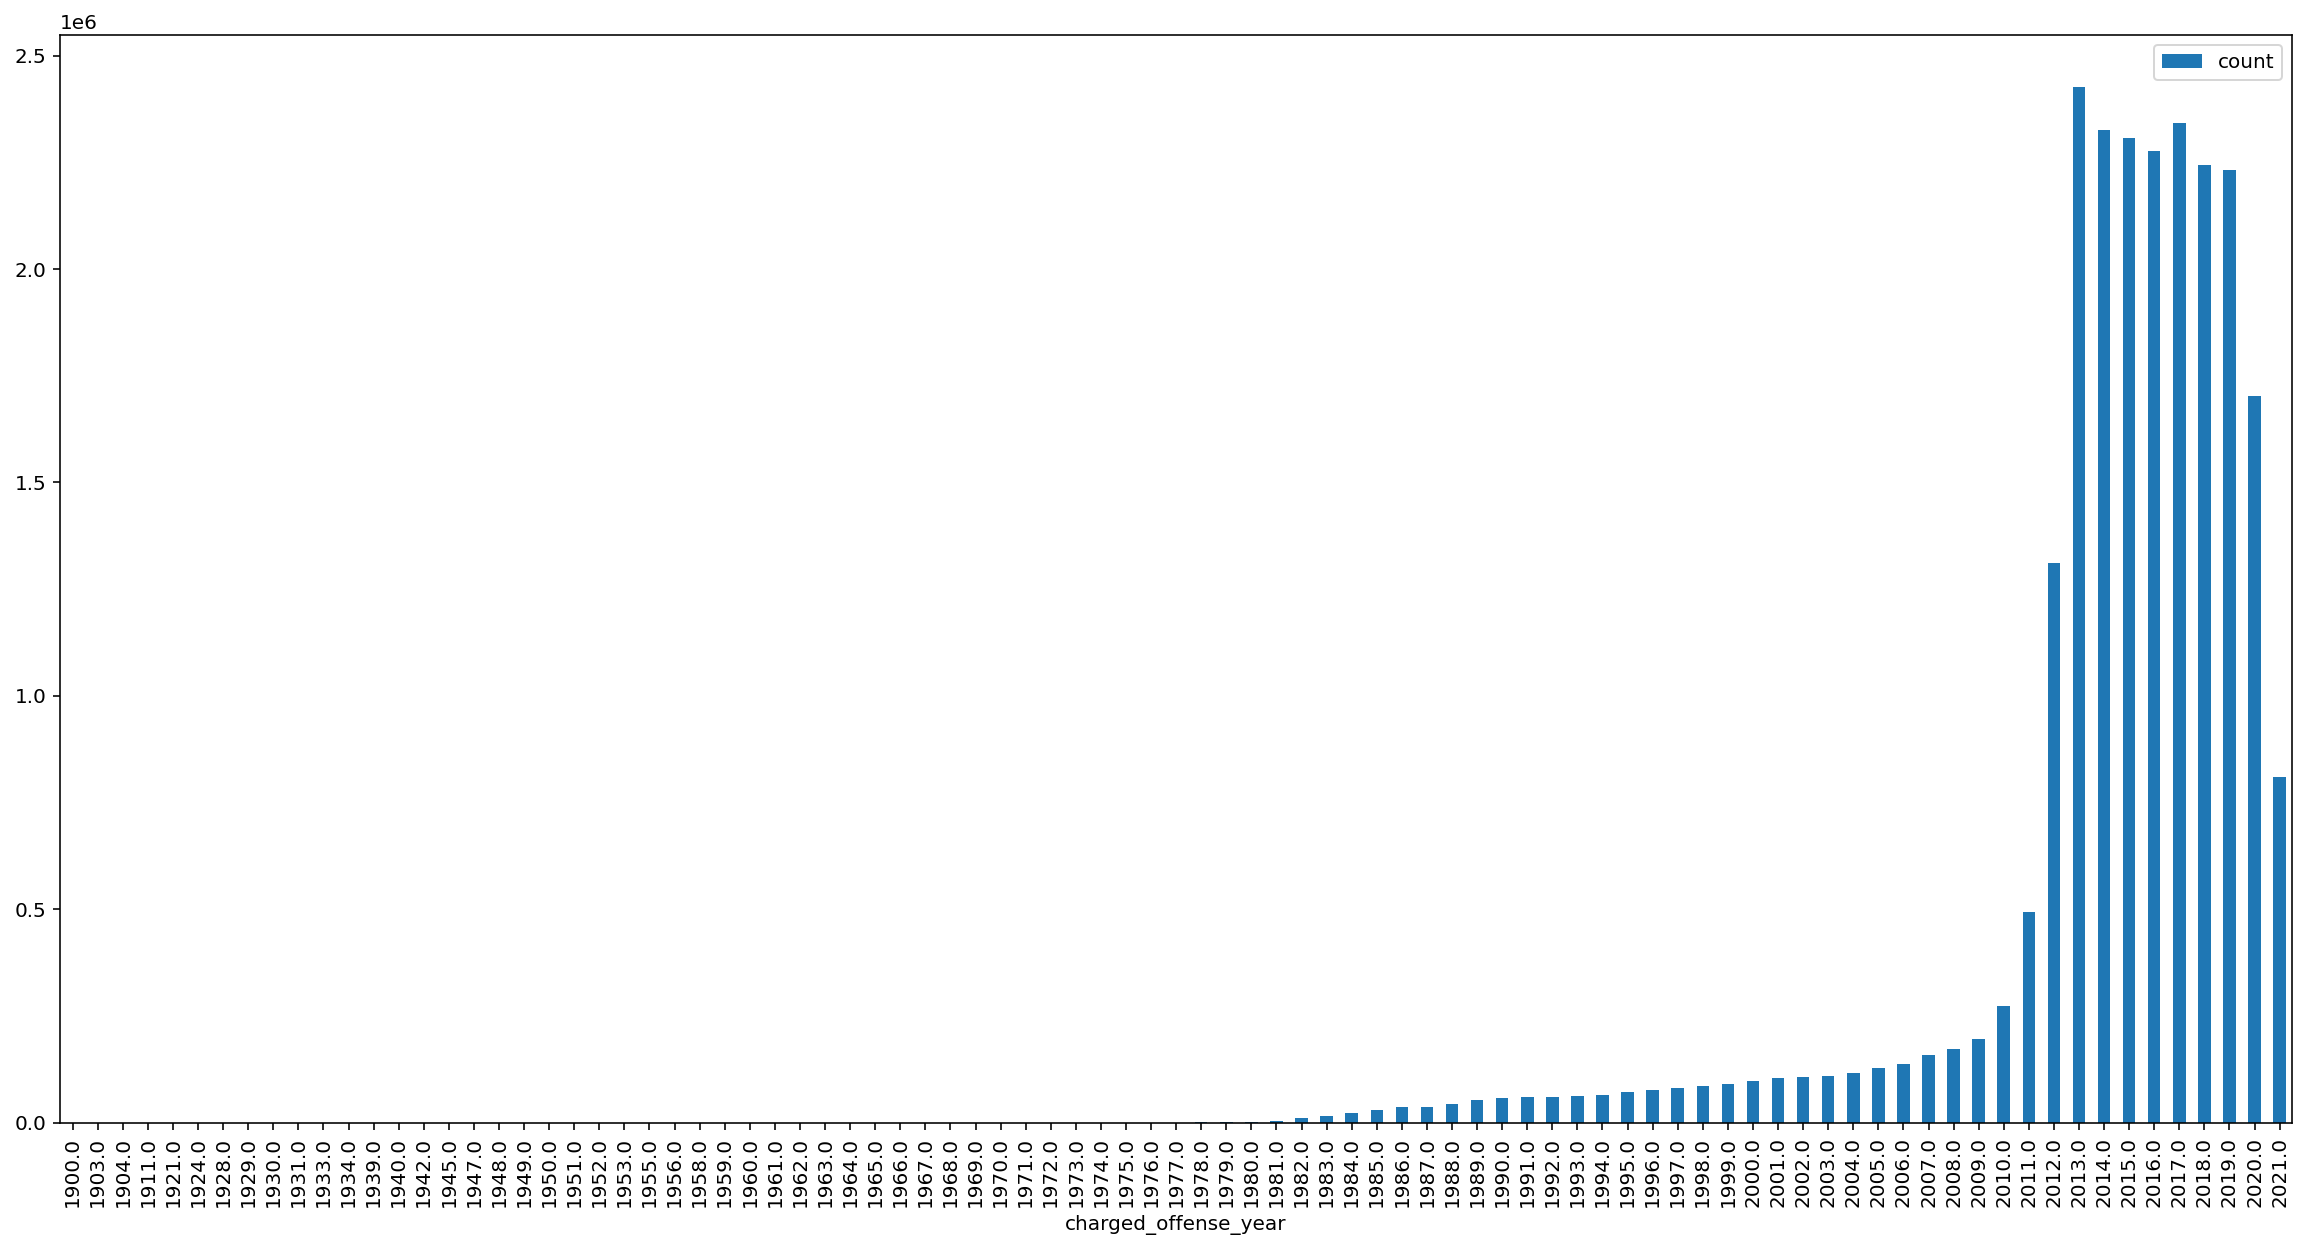

In [29]:
case_off['count']=1
case_off[['count', 'charged_offense_year']].groupby('charged_offense_year').sum().plot(kind='bar', figsize=(20,10))

<AxesSubplot:xlabel='process_service_year'>

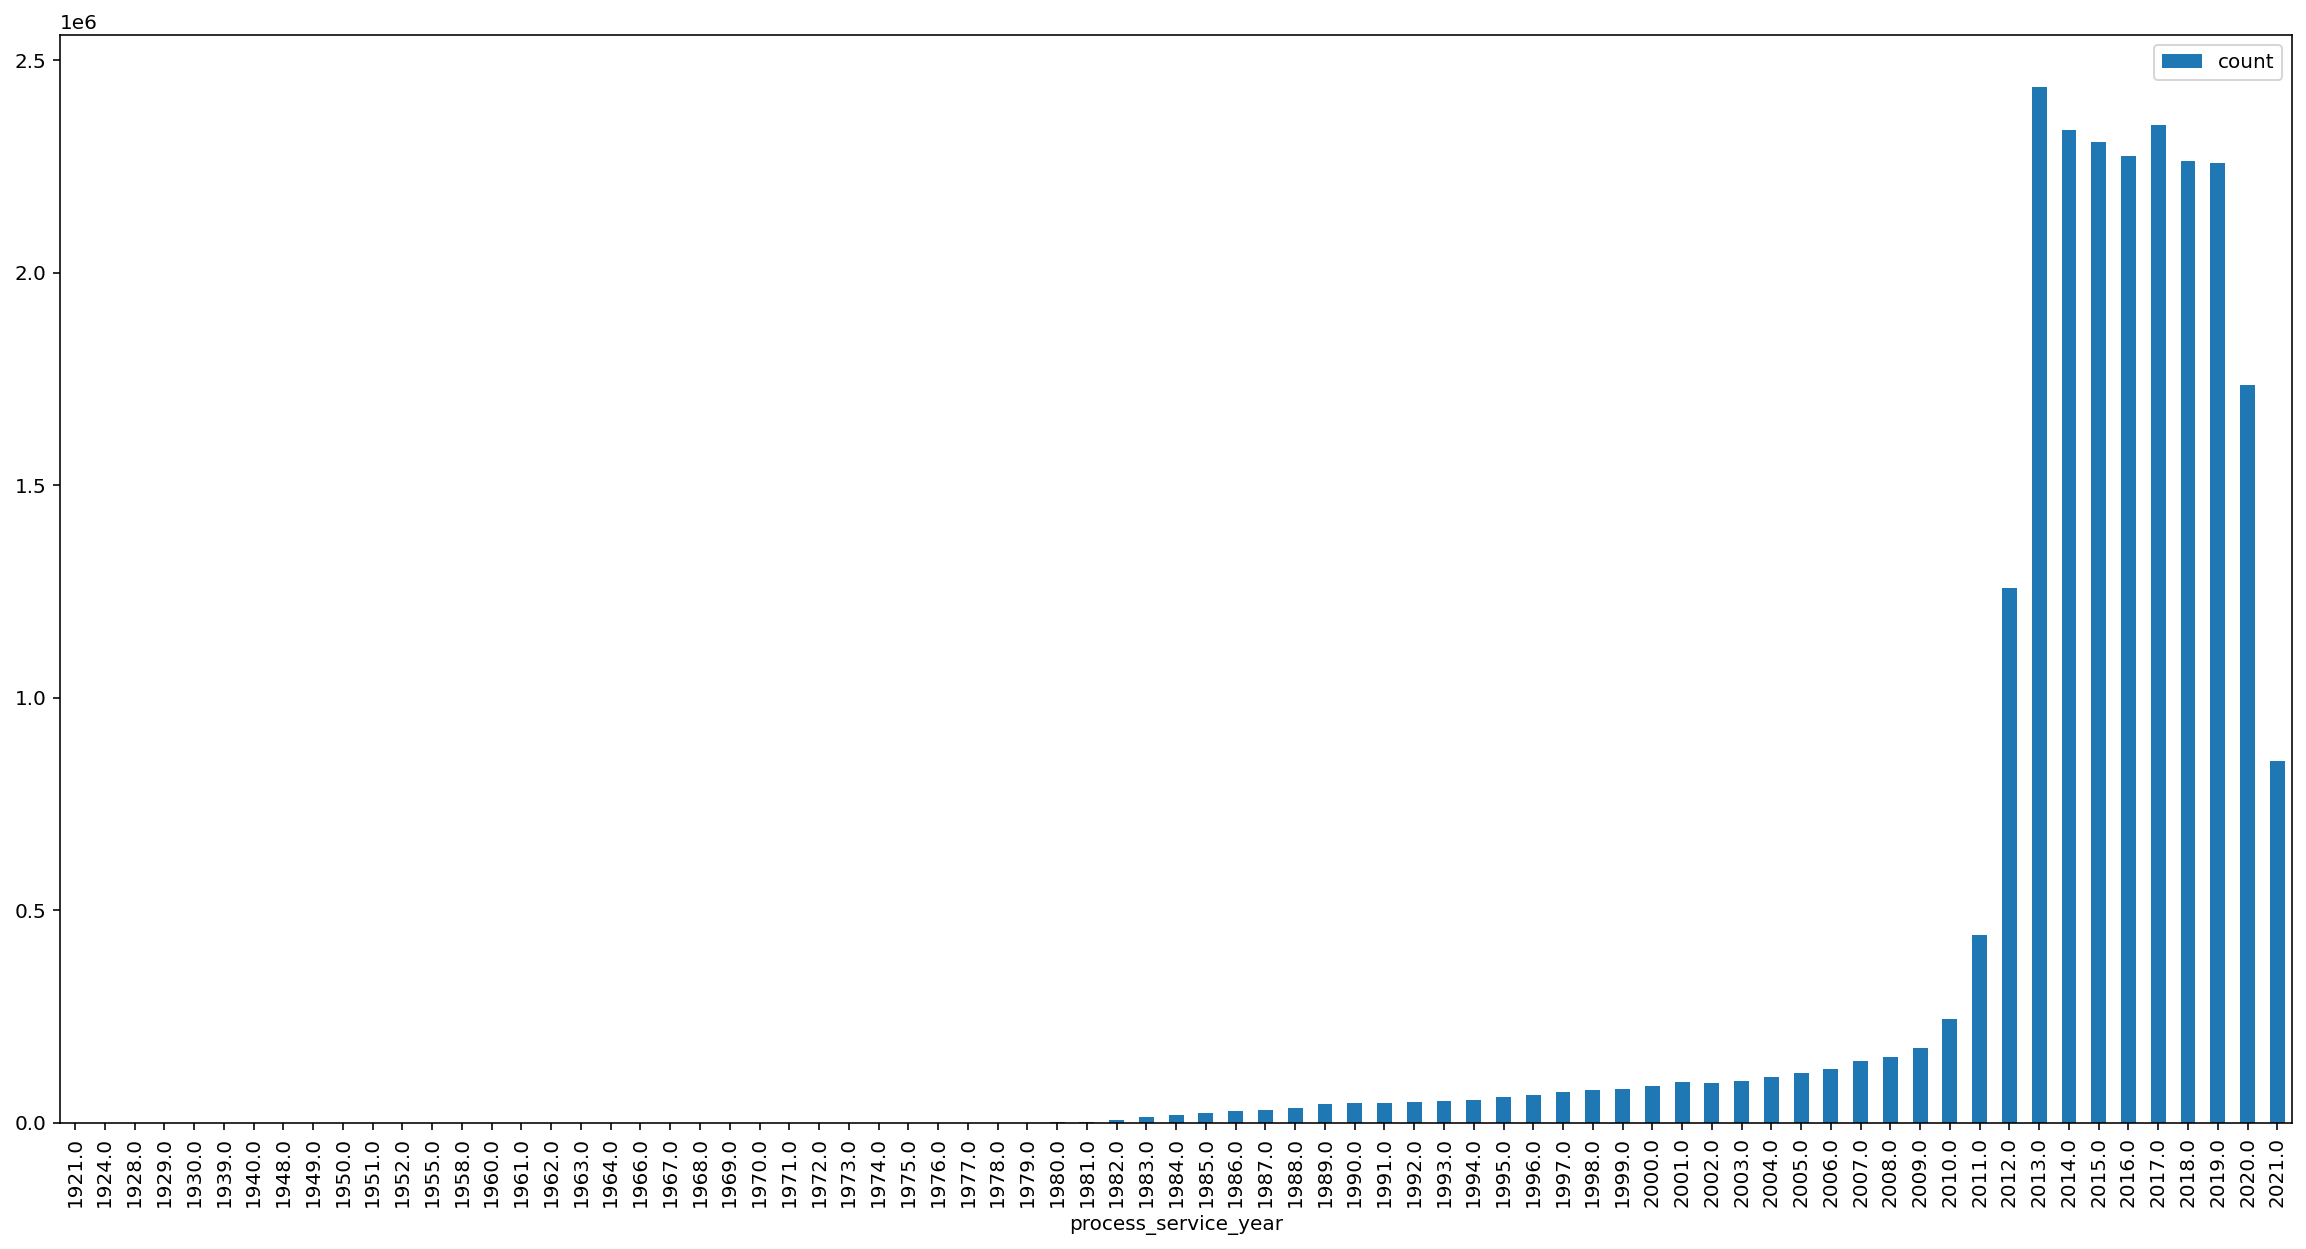

In [32]:
case_off[['count', 'process_service_year']].groupby('process_service_year').sum().plot(kind='bar', figsize=(20,10))

In [5]:
# Merge with offence code descriptions:
offense_desc = pd.read_csv(
    "/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone/00_raw_data/ACIS_offence_codes.csv",
    low_memory=False,
    index_col=[0],
)

#Drop bad columns
offense_desc.sample(5)
offense_desc = offense_desc[
    ["CODE", "Offense Description", 'T', "NC General Statute", "CL"]
]

case_off_desc = pd.merge(
    left=case_off,
    right=offense_desc,
    left_on="charged_offense_code",
    right_on="CODE",
    how="left",
    validate="m:m",
    indicator=True,
)
case_off_desc._merge.value_counts()


both          31154833
left_only           41
right_only           0
Name: _merge, dtype: int64

In [6]:
to_save = case_off_desc[
    [
        "case_id",
        "key_county_num",
        "key_year",
        "court_type",
        "race",
        "sex",
        "process_served",
        "case_creation_date",
        "case_trial_date",
        "court_attorney_type",
        "bond_type",
        "bond_amount",
        "charged_offense_date",
        "charged_offense_code",
        "Offense Description",
        "CL",
        "convicted_offense_code",
        "disposition",
        "disposition_date",
    ]
]
#to_save.to_csv('/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone/10_clean_data/case_offense_desc_.csv')

In [7]:
# lets keep only the ones we know should exist:
dispos = [
    "CD",
    "CV",
    "DC",
    "DD",
    "FE",
    "HC",
    "JR",
    "JU",
    "LC",
    "MA",
    "NB",
    "NP",
    "NS",
    "OT",
    "PC",
    "PO",
    "PR",
    "RM",
    "SI",
    "ST",
    "TD",
    "VD",
    "VL",
    "WC",
    "WD",
    "WE",
    "WM",
    "WP",
]
case_off_desc.loc[case_off_desc["disposition"] == "vd", "disposition"] = "VD"

# lol just 7 rows have dispositions that dont exist
case_off_desc = case_off_desc.loc[case_off_desc["disposition"].isin(dispos)]


In [8]:
case_off_desc["dispo_desc"] = "None"
case_off_desc.loc[
    case_off_desc["disposition"] == "CD", "dispo_desc"
] = "Capasity Dismissed w/o leave"  # dism
case_off_desc.loc[
    case_off_desc["disposition"] == "CV", "dispo_desc"
] = "Change of Venue"
case_off_desc.loc[
    case_off_desc["disposition"] == "DC", "dispo_desc"
] = "Dismissed by the Court"
case_off_desc.loc[
    case_off_desc["disposition"] == "DD", "dispo_desc"
] = "Deferred Proceeding or Deferred Prosecution Dismissal (Probation)"
case_off_desc.loc[
    case_off_desc["disposition"] == "FE", "dispo_desc"
] = "Fight Extradition"
case_off_desc.loc[
    case_off_desc["disposition"] == "HC", "dispo_desc"
] = "Habeas Corpus Hearing (superior only)"
case_off_desc.loc[case_off_desc["disposition"] == "JR", "dispo_desc"] = "Jury"
case_off_desc.loc[
    case_off_desc["disposition"] == "JU", "dispo_desc"
] = "Judge (not dismissed?)"
case_off_desc.loc[
    case_off_desc["disposition"] == "LC", "dispo_desc"
] = "Capasity Dismissed with leave"  # dism
case_off_desc.loc[case_off_desc["disposition"] == "MA", "dispo_desc"] = "Magistrate"
case_off_desc.loc[
    case_off_desc["disposition"] == "NB", "dispo_desc"
] = "No True Bill Returned (by Jury)"  # dism
case_off_desc.loc[
    case_off_desc["disposition"] == "NP", "dispo_desc"
] = "No Probable Cause"  # dism
case_off_desc.loc[
    case_off_desc["disposition"] == "NS", "dispo_desc"
] = "Never to Be Served"
case_off_desc.loc[case_off_desc["disposition"] == "OT", "dispo_desc"] = "Otherwise"
case_off_desc.loc[
    case_off_desc["disposition"] == "PC", "dispo_desc"
] = "Probable Cause Found"
case_off_desc.loc[
    case_off_desc["disposition"] == "PO", "dispo_desc"
] = 'Process Other (use in place of "OT" except for offense 9954)'
case_off_desc.loc[
    case_off_desc["disposition"] == "PR", "dispo_desc"
] = "PROCESS/PROBATION REVOKED by Judge"
case_off_desc.loc[
    case_off_desc["disposition"] == "RM", "dispo_desc"
] = "Remanded to District Court"
case_off_desc.loc[
    case_off_desc["disposition"] == "SI", "dispo_desc"
] = "Superseding Indictment"
case_off_desc.loc[
    case_off_desc["disposition"] == "ST", "dispo_desc"
] = "Dismissed Speedy Trial"
case_off_desc.loc[
    case_off_desc["disposition"] == "TD", "dispo_desc"
] = "Tranfer to District"
case_off_desc.loc[
    case_off_desc["disposition"] == "VD", "dispo_desc"
] = "Voluntary Dismissal by DA"
case_off_desc.loc[
    case_off_desc["disposition"] == "VL", "dispo_desc"
] = "Dismissal with leave by DA"
case_off_desc.loc[case_off_desc["disposition"] == "WC", "dispo_desc"] = "Waiver - Clerk"
case_off_desc.loc[
    case_off_desc["disposition"] == "WD", "dispo_desc"
] = "Withdrawn From Superior Court"
case_off_desc.loc[
    case_off_desc["disposition"] == "WE", "dispo_desc"
] = "Waiver of Extradition (Code 9901 or 5099 only)"
case_off_desc.loc[
    case_off_desc["disposition"] == "WM", "dispo_desc"
] = "Waiver - Magistrate"
case_off_desc.loc[
    case_off_desc["disposition"] == "WP", "dispo_desc"
] = "Waived Probable Cause (Transfer to Superior Court)"


# Dates
### Whats the real order of events?

In [9]:

pd.set_option("display.max_columns", None)
case_off_desc[
    [
        "charged_offense_date", #charged by the police
        "arraigned_offense_date", # either the same day or the day after arrested and charged, defendants are brought before a magistrate judge for an initial hearing on the case.
        "jail_commited_date",
        "jail_release_date",
        "process_service_date", # internal processing date?
        "case_creation_date", # internal case record creation date?
        "case_trial_date", # actual trial, if it happens 
        "indictment_date", # a formal charge or accusation 
        "disposition_date", # cna be before or after trial
        "disposition",
    ]
].sample(10)


,charged_offense_date,arraigned_offense_date,jail_commited_date,jail_release_date,process_service_date,case_creation_date,case_trial_date,indictment_date,disposition_date,disposition
30041185,2001-05-08,2001-05-08,NaN,NaN,NaN,2001-08-31,NaN,NaN,2019-01-22,VD
17082803,2012-12-17,NaN,NaN,NaN,2012-12-17,2012-12-20,2013-01-08,NaN,2013-01-28,WC
28502062,2015-02-08,NaN,NaN,NaN,2015-02-08,2015-02-09,2015-05-06,NaN,2015-05-06,JU
20623072,2019-04-21,NaN,NaN,NaN,2019-04-21,2019-04-24,2020-09-09,NaN,2020-09-09,VD
89377,2013-04-26,2013-04-26,NaN,NaN,2013-04-26,2013-04-26,2014-03-06,NaN,2014-03-06,JU
5198792,1993-09-06,NaN,NaN,NaN,1993-09-06,1993-09-09,1996-11-18,NaN,1994-02-14,JU
1513304,2016-01-06,NaN,NaN,NaN,2016-01-06,2016-01-06,2016-02-10,NaN,2016-02-10,VD
30269794,2016-12-11,NaN,NaN,NaN,2016-12-11,2016-12-12,2017-03-24,NaN,2017-03-08,WC
5378405,2017-02-25,NaN,NaN,NaN,2017-02-25,2017-02-26,2017-05-23,NaN,2018-03-16,VL
27655590,2002-02-19,NaN,NaN,NaN,2002-02-19,2002-03-05,2002-03-19,NaN,2019-06-25,VD


In [10]:
case_off_desc.loc[
    case_off_desc["arraigned_offense_date"].isna(), "disposition"
].value_counts(dropna=False, normalize=True)*100


VD    55.740780
JU    20.217896
WC    11.793977
VL     6.336807
PO     3.069883
PR     0.633311
DC     0.509588
DD     0.334989
SI     0.308479
OT     0.285313
RM     0.177394
NS     0.168564
WM     0.160408
JR     0.114783
NP     0.059195
WP     0.024521
WD     0.018739
NB     0.015844
CV     0.010380
MA     0.009161
PC     0.002968
WE     0.002293
LC     0.001858
CD     0.001178
HC     0.001074
TD     0.000385
FE     0.000204
ST     0.000027
Name: disposition, dtype: float64

In [22]:
0.633311
+0.509588
+0.334989
+0.308479
+0.285313
+0.177394
+0.168564
+0.160408
+ 0.114783
+ 0.059195
+0.024521
+0.018739
+0.015844
+0.010380
+0.009161
+ 0.002968
+0.002293
+0.001858
+0.001178
+ 0.001074
+0.000385
+0.000204
+ 0.000027

2.7e-05

## Dispositions Key
#### Method of Disposition
* CD - Capacity Dismissed Without Leave *(dropped charges by judge?)*
* CV - Change of Venue
* DC - Dismissed by the Court
* DD - Deferred Proceeding or Deferred Prosecution Dismissal: Deferred prosecution under G.S. 15A-1341(a1) is a procedure whereby a defendant charged with a crime is not brought to trial, but is instead placed on probation. If the defendant successfully completes the period of probation (which can be for up to two years), the prosecutor agrees to dismiss the charges.
#### Dismissal
* FE - Fight Extradition
* HC - Habeas Corpus Hearing (superior only): a person may attempt to challenge the legal basis for continuing to hold him or her in custody
* JR - Jury                  
* JU - ***Judge***: **NOT DISMISSED, sentence**            
* LC - Capacity Dismissed with Leave: FAIL TO APPEAR
* MA - Magistrate
* NB - No True Bill Returned
* NP - No Probable Cause
* NS - Never to Be Served
* OT - Otherwise
* PC - Probable Cause Found
* PO - **Process Other (use in place of "OT" except for offense 9954)**
* PR - Process/probation Revocation (by judge)
* RM - Remanded to District Court
* SI - **Superseding Indictment**: *"If at any time before entry of a plea of guilty to an indictment or information, or commencement of a trial thereof, another indictment or information is filed in the same court charging the defendant with an offense (...), the count of the first instrument charging the offense must be dismissed by the superior court judge"*
* ST - Dismissed Speedy Trial
* TD - Tranfer to District
* VD - ***Voluntary Dismissal DA***: North Carolina Rule of Civil Procedure 41(a) permits a plaintiff to voluntarily dismiss its claims without prejudice any time before resting its case. A plaintiff may only take a voluntary dismissal without prejudice under Rule 41(a) once. A second voluntary dismissal will be with prejudice, and will prevent the plaintiff from refiling its case, unless the court orders otherwise.  https://www.klgates.com/Voluntary-Dismissal-in-North-Carolina-A-Primer-10-5-2020#:~:text=North%20Carolina%20Rule%20of%20Civil,time%20before%20resting%20its%20case.
* VL - **Dismissal With Leave by DA**
* WC - ***Waiver - Clerk***
* WD - Withdrawn From Superior Court
* WE - Waiver of Extradition (Code 9901 or 5099 only)
* WM - Waiver - Magistrate
* WP - Waived Probable Cause (Transfer to Superior Court)

<AxesSubplot:title={'center':'Percentages of offenses by dispositions'}>

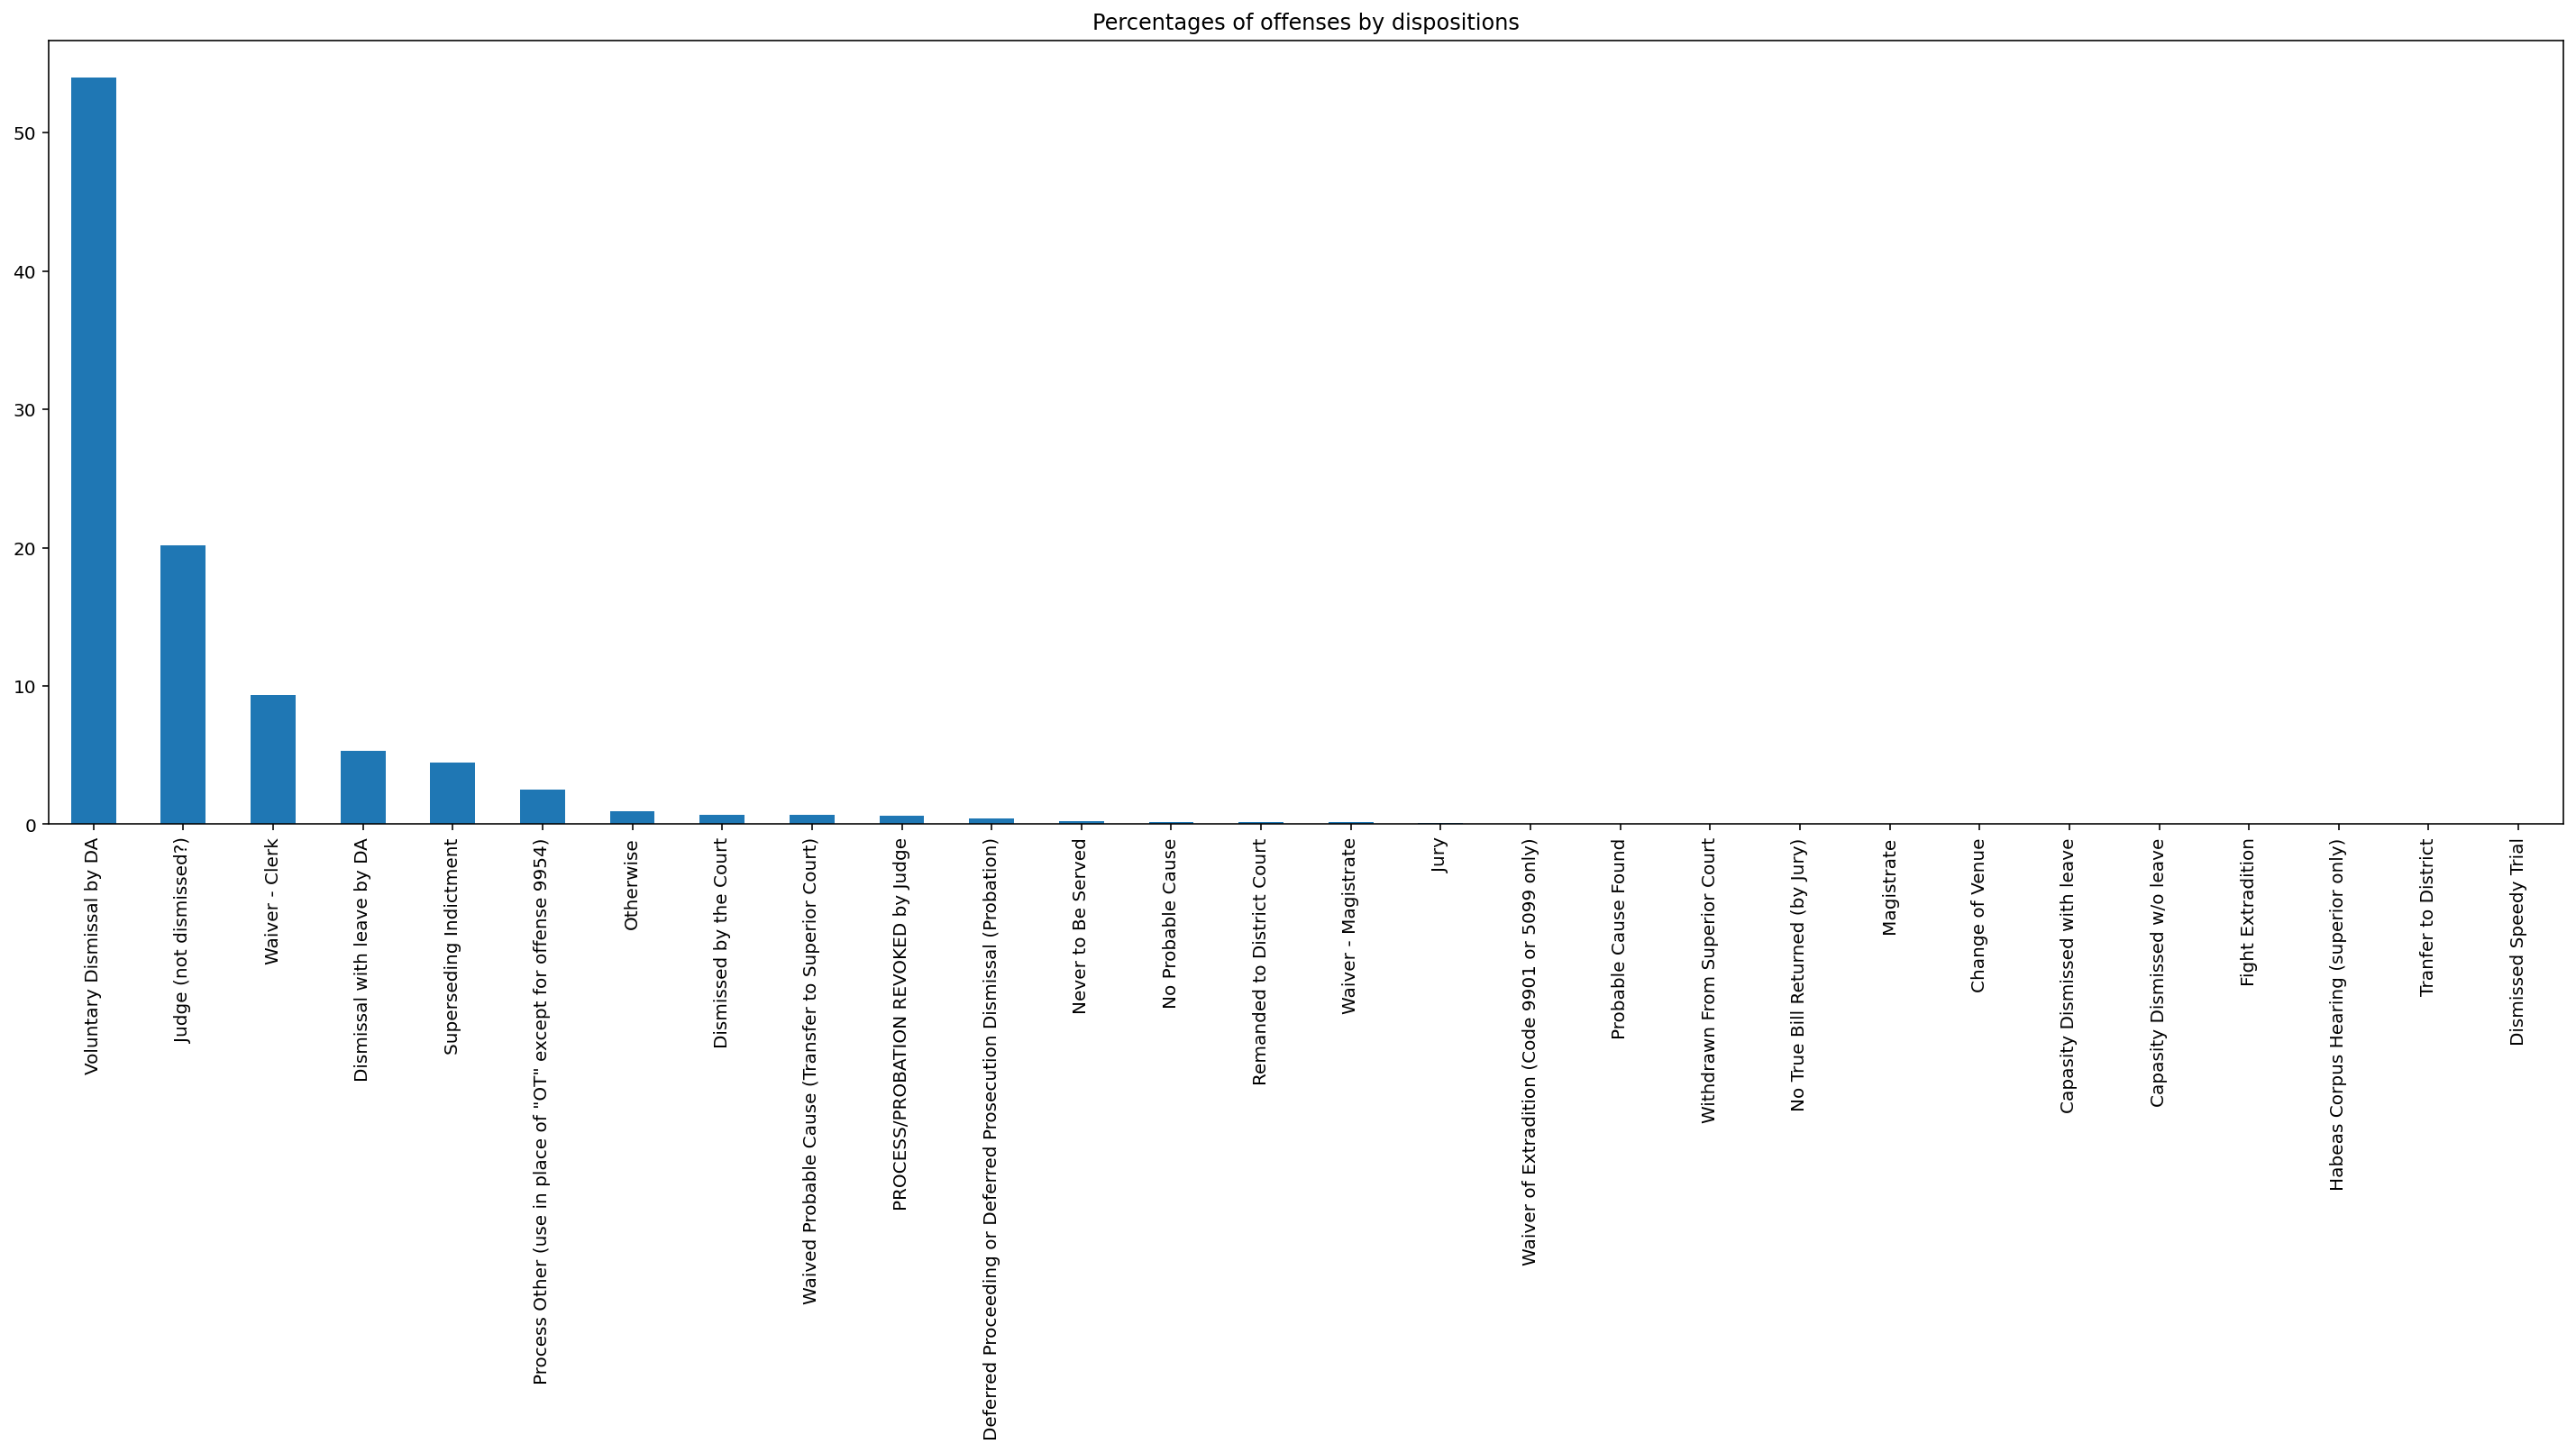

In [11]:
(case_off_desc["dispo_desc"].value_counts(dropna=False, normalize=True)*100).plot(kind='bar', figsize=(25, 8), title='Percentages of offenses by dispositions')



In [12]:
case_off_desc.loc[case_off_desc['convicted_offense_code'].isna(), 'disposition'].value_counts(dropna=False, normalize=True)*100

VD    76.404104
VL     7.502860
SI     6.350631
PO     3.546956
OT     1.332665
DC     1.006670
WP     0.969016
PR     0.871464
DD     0.610951
JU     0.488849
NS     0.284875
NP     0.216666
RM     0.196876
WE     0.065946
PC     0.042880
JR     0.039701
WD     0.020801
NB     0.017592
CV     0.016083
LC     0.006867
CD     0.003154
FE     0.002309
HC     0.001192
TD     0.000428
WC     0.000206
MA     0.000181
ST     0.000055
WM     0.000020
Name: disposition, dtype: float64

<AxesSubplot:title={'center':'Percentages of offenses by dispositions'}>

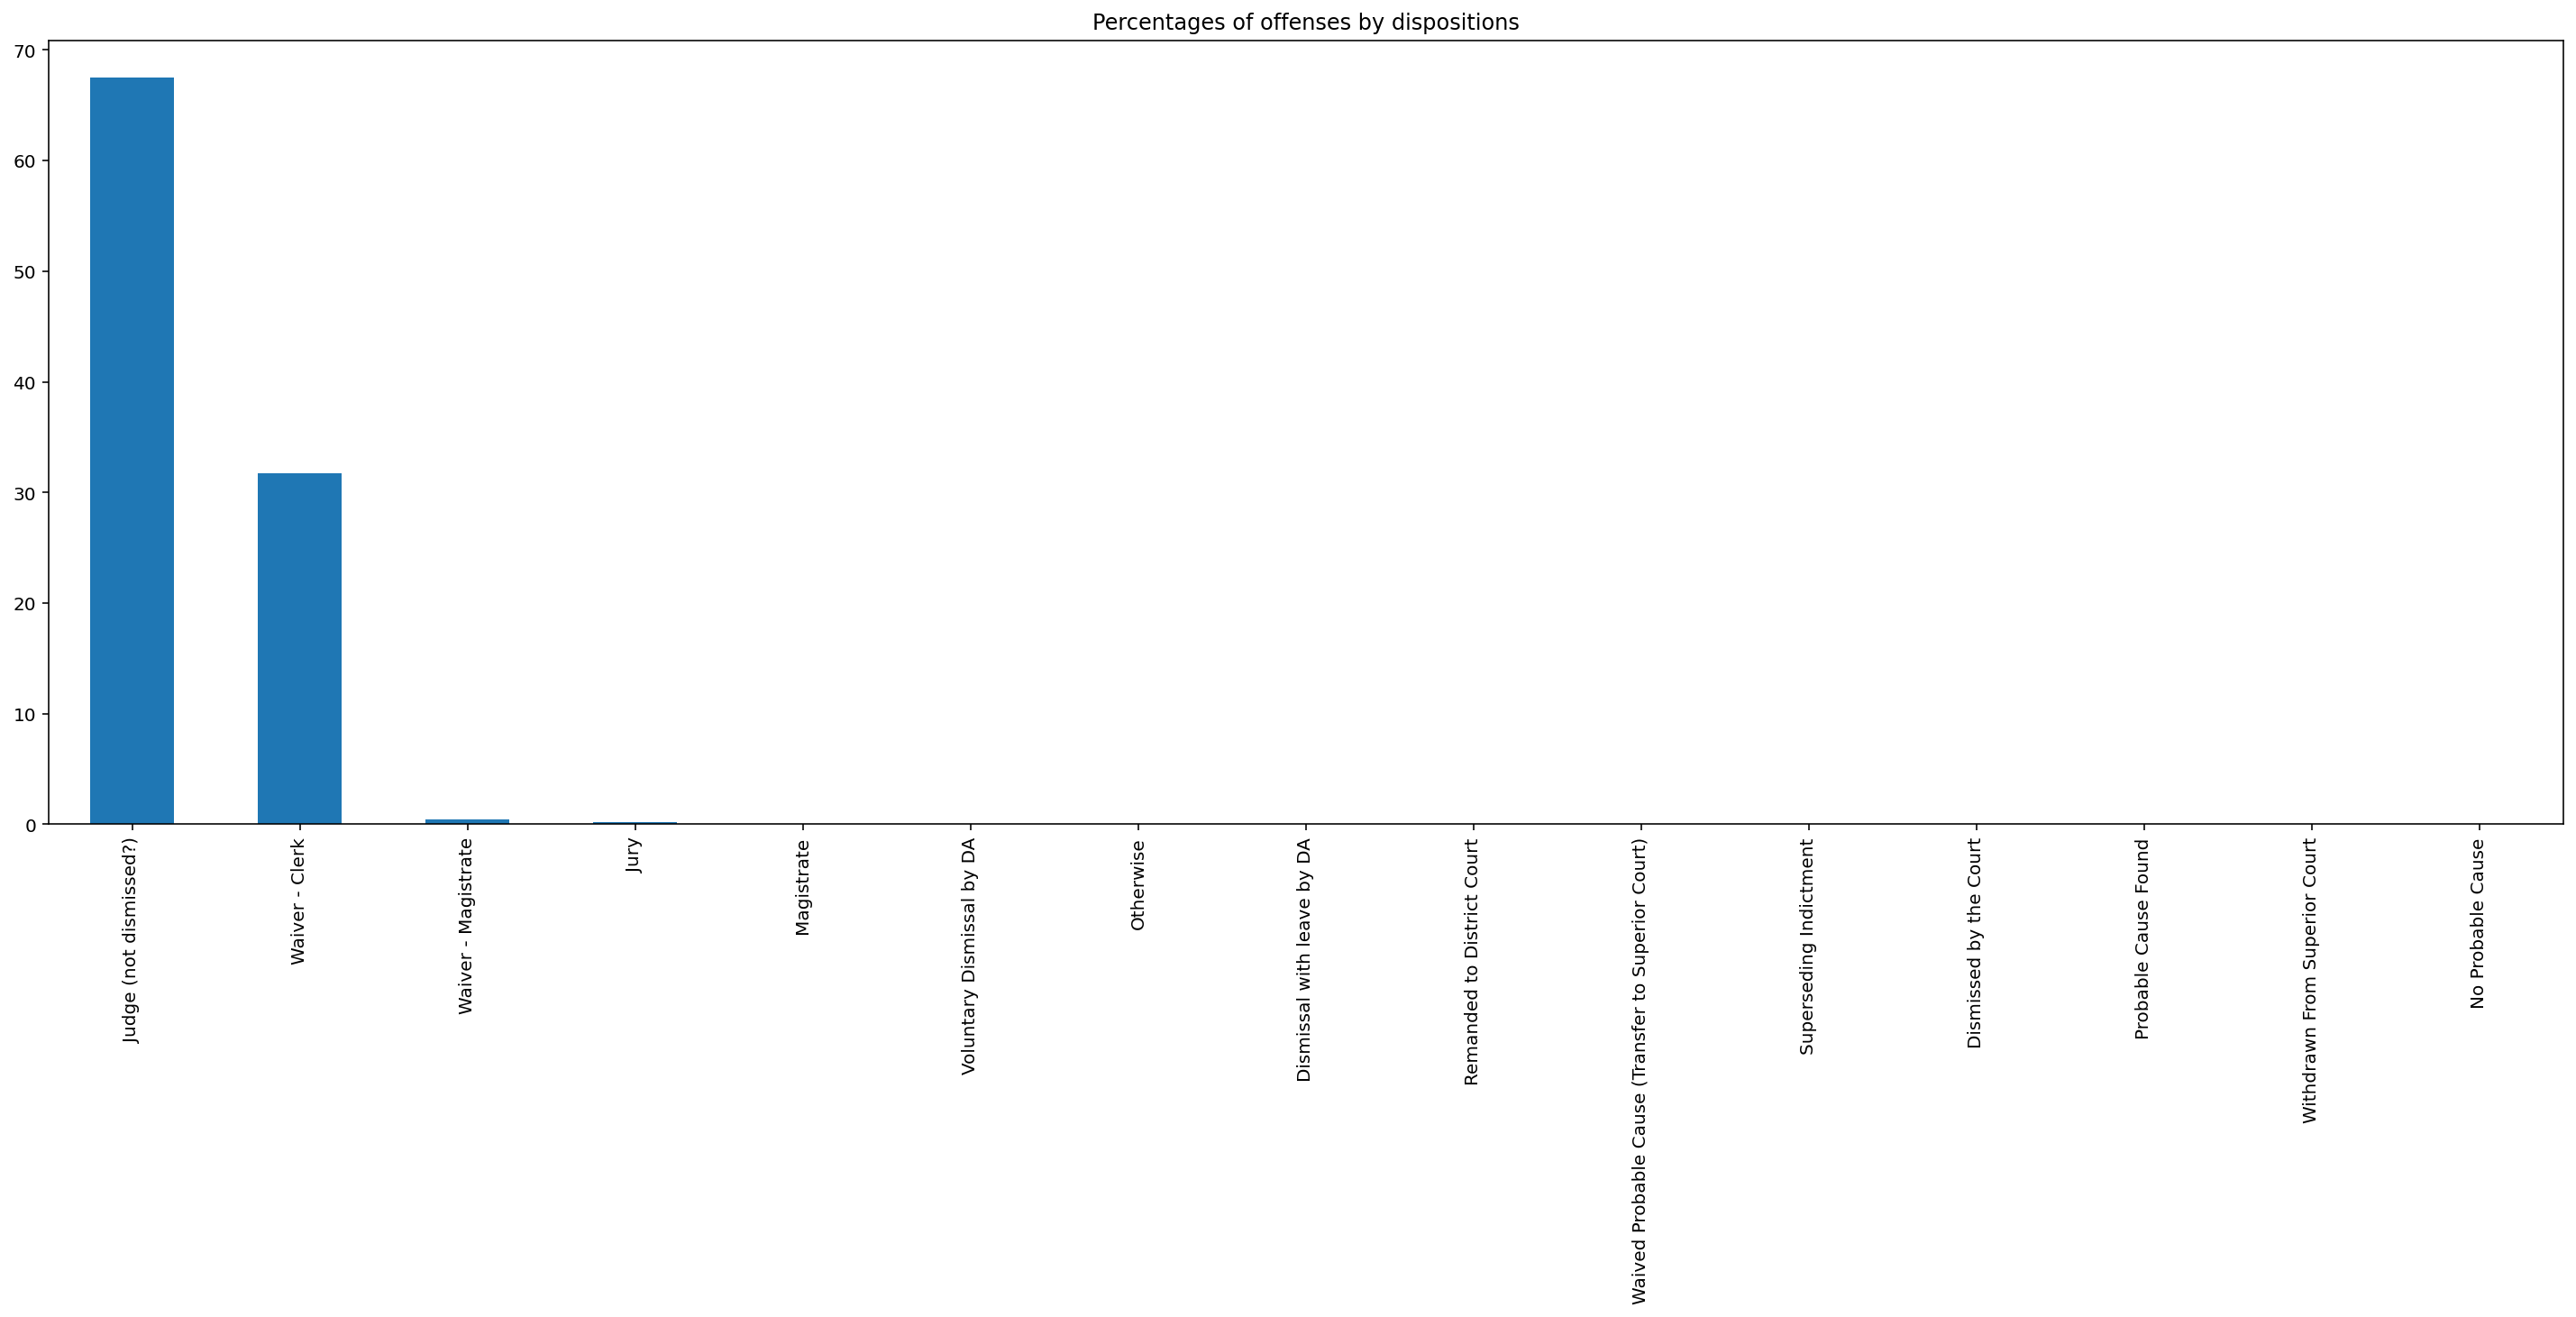

In [13]:
(case_off_desc.loc[~case_off_desc['convicted_offense_code'].isna(),"dispo_desc"].value_counts(dropna=False, normalize=True)*100).plot(kind='bar', figsize=(25, 8), title='Percentages of offenses by dispositions')

In [14]:
# Missing data function:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [15]:
# Lets look at VD only
df_VD = case_off_desc.loc[case_off_desc['disposition']=='VD']
df_VD.sample(10)

,case_id,key_county_num,key_county_num.1,key_century,key_year,court_type,def_street_address,def_city_address,def_state_address,def_zip_address,def_ext_zip_address,date_of_birth,race,sex,process_served,case_creation_date,process_service_date,case_trial_date,court_attorney_type,indictment_date,bond_type,bond_amount,in_jail_indicator,jail_release_date,jail_commited_date,arrest_date,domestic_violence,race_gender,CRRKEY,charged_offense_date,charged_offense_code,arraigned_offense_date,convicted_offense_code,plea_code,verdict_code,disposition,disposition_date,judge_code,min_sentence,max_sentence,min_sentence_frame,fines,restitution,probation_len,probation_frame,supervised_probation_flag,date to paid,monies_paid_flag,more_offense_check_flag,max_sentence_frame,domestic_violence_flag,active_sentence_ind,community_service_hr,offense_class,prior_record_points,judgement_file_number,judgement_file_offense_num,court_cost,min_sentence_day,max_sentence_day,CODE,Offense Description,T,NC General Statute,CL,_merge,dispo_desc
27439475,9101991065665,910,910,19,91,CR,507 E EDENTON ST,RALEIGH,NC,27601,NaN,NaN,B,M,S,1991-09-06,1991-08-24,1991-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black Male,910199106566500201001100,1991-08-24,1336,NaN,NaN,NaN,NaN,VD,2019-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1336.0,ASSAULT AND BATTERY,M,14-33(A),2,both,Voluntary Dismissal by DA
17547964,5902014048347,590,590,20,14,CR,2121 ARBOR VISTA DR,CHARLOTTE,NC,28262,2470,f11c5ca37d879378d9586c4ddb19f8b944e1d529f01297...,H,F,C,2014-12-16,2014-12-12,2016-02-26,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic Female,590201404834700201001100,2014-12-12,4716,NaN,NaN,NaN,NaN,VD,2016-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4716.0,DWLR NOT IMPAIRED REV,T,20-28(A),3,both,Voluntary Dismissal by DA
1351400,902012002647,90,90,20,12,CR,475 SANDRIDGE RD,LITTLE RIVER,SC,29566,NaN,ed94d95b6b744f812a993b491102299d8be5ad8816e62e...,B,M,C,2012-07-10,2012-06-25,2013-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black Male,090201200264700201001100,2012-06-25,5494,NaN,NaN,NaN,NaN,VD,2013-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5494.0,OPERATE VEH NO INS,T,20-313(A),1,both,Voluntary Dismissal by DA
9001097,3302013715812,330,330,20,13,CR,1285 LOCKLAND TER,WINSTON SALEM,NC,27103,NaN,76cffb91ff06dbc3f1654b38628461ca4fe34601d7c34f...,W,M,C,2013-06-10,2013-06-09,2013-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White Male,330201371581200402001100,2013-06-09,4440,NaN,NaN,NaN,NaN,VD,2013-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4440.0,EXPIRED/NO INSPECTION,I,20-183.8(A)(1),0,both,Voluntary Dismissal by DA
2519360,1102019050252,110,110,20,19,CR,2066 ANTIOCH RD,MORGANTON,NC,28655,NaN,f0de608a31522846379cf9ebc8e07933ef4c5f88d58360...,W,M,S,2019-01-29,2019-07-03,2019-11-22,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White Male,110201905025200201001100,2019-01-28,5709,2019-01-28,NaN,NaN,NaN,VD,2019-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5709.0,SECOND DEGREE TRESPASS,M,14-159.13,3,both,Voluntary Dismissal by DA
11928141,4002015079890,400,400,20,15,CR,210 WELCH DR,HIGH POINT,NC,27265,NaN,d988ca1ef2ea637e93b010cd17ea727f3e847dd56ac812...,W,M,W,2015-07-09,2015-07-29,2015-09-04,A,NaN,SEC,1.0,NaN,NaN,NaN,NaN,NaN,White Male,400201507989000201001100,2015-06-30,2399,2015-06-30,NaN,NaN,NaN,VD,2015-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2399.0,LARCENY - FREE TEXT,,,??,both,Voluntary Dismissal by DA
8729018,3302008013092,330,330,20,8,CR,2223 MANCHESTER ST,WINSTON SALEM,NC,27105,5535,5970b34d6194a1f0b65f54190b3ce1ea23c621e9a38f4a...,B,M,C,2008-05-14,2008-04-17,2008-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black Male,330200801309200502001100,2008-04-17,5441,NaN,NaN,NaN,NaN,VD,2017-12-04,NaN,NaN,NaN,NaN,NaN,

In [16]:
# where does the process end for VD?
missing_zero_values_table(df_VD)

Your selected dataframe has 67 columns and 15189454 Rows.
There are 54 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
judgement_file_number,0,15189454,100.0,15189454,100.0,float64
jail_commited_date,0,15189454,100.0,15189454,100.0,float64
jail_release_date,0,15189454,100.0,15189454,100.0,float64
judgement_file_offense_num,0,15189454,100.0,15189454,100.0,float64
max_sentence_frame,0,15189452,100.0,15189452,100.0,object
max_sentence,0,15189452,100.0,15189452,100.0,float64
prior_record_points,2,15189452,100.0,15189454,100.0,float64
active_sentence_ind,0,15189452,100.0,15189452,100.0,object
offense_class,0,15189452,100.0,15189452,100.0,object
max_sentence_day,0,15189452,100.0,15189452,100.0,float64


## Race-Gender composition of Dispositions

In [17]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

In [18]:
case_off_desc["count"] = 1
rgd = (
    case_off_desc[["race_gender", "disposition", "count"]]
    .groupby(by=["race_gender", "disposition"])
    .sum()
    .reset_index()
)
rgd.sample(5)


,race_gender,disposition,count
108,Other,CV,75
135,White Female,DC,38081
90,Hispanic Male,NB,69
67,Hispanic Female,OT,2138
120,Other,OT,11101


In [19]:
# case_off_desc[['race','disposition']].value_counts().plot(kind='bar', stacked=True, figsize=(25, 8))
rgd  # .loc[rgd["race_gender"] == "White Female"]#.plot(kind='bar', figsize=(25, 8))
pivot_rgd = pd.pivot_table(
    data=rgd, index=["race_gender"], columns=["disposition"], values="count"
)
pivot_rgd


disposition,CD,CV,DC,DD,FE,HC,JR,JU,LC,MA,NB,NP,NS,OT,PC,PO,PR,RM,SI,ST,TD,VD,VL,WC,WD,WE,WM,WP
race_gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Black Female,64.0,71.0,18486.0,22267.0,22.0,1.0,1224.0,636986.0,108.0,434.0,187.0,1890.0,4434.0,14943.0,241.0,80307.0,9361.0,2473.0,70721.0,NaN,3.0,1953399.0,226788.0,253059.0,174.0,649.0,6449.0,10797.0
Black Male,244.0,913.0,45105.0,31953.0,201.0,135.0,12595.0,1438079.0,686.0,1525.0,1564.0,9706.0,6249.0,56850.0,3880.0,254194.0,58446.0,9379.0,562714.0,4.0,43.0,3985857.0,461892.0,344837.0,820.0,4458.0,8482.0,72223.0
Hispanic Female,3.0,6.0,1738.0,1849.0,4.0,NaN,76.0,132874.0,1.0,5.0,9.0,228.0,139.0,2138.0,11.0,2498.0,216.0,168.0,3726.0,NaN,NaN,271826.0,32070.0,160862.0,38.0,41.0,2032.0,493.0
Hispanic Male,9.0,95.0,5993.0,4057.0,13.0,6.0,813.0,378043.0,25.0,53.0,69.0,2020.0,544.0,16305.0,298.0,13077.0,2280.0,1259.0,34218.0,NaN,3.0,1129117.0,149174.0,433230.0,109.0,315.0,4841.0,4564.0
Other,18.0,75.0,11376.0,5239.0,14.0,29.0,543.0,297616.0,32.0,232.0,76.0,1735.0,31847.0,11101.0,175.0,22783.0,5126.0,1137.0,38794.0,NaN,NaN,926069.0,97759.0,137272.0,159.0,367.0,2584.0,4272.0
White Female,116.0,333.0,38081.0,22387.0,41.0,5.0,1644.0,946314.0,166.0,274.0,328.0,7371.0,5357.0,45041.0,663.0,110693.0,26675.0,6851.0,135301.0,NaN,13.0,2450795.0,183754.0,486918.0,802.0,1757.0,4675.0,26831.0
White Male,173.0,1704.0,79335.0,33696.0,164.0,61.0,8473.0,1845007.0,347.0,884.0,1264.0,20121.0,8059.0,119578.0,3258.0,221530.0,71130.0,17886.0,416942.0,7.0,23.0,4472391.0,340154.0,808789.0,2034.0,5522.0,7591.0,73452.0


<AxesSubplot:xlabel='race_gender'>

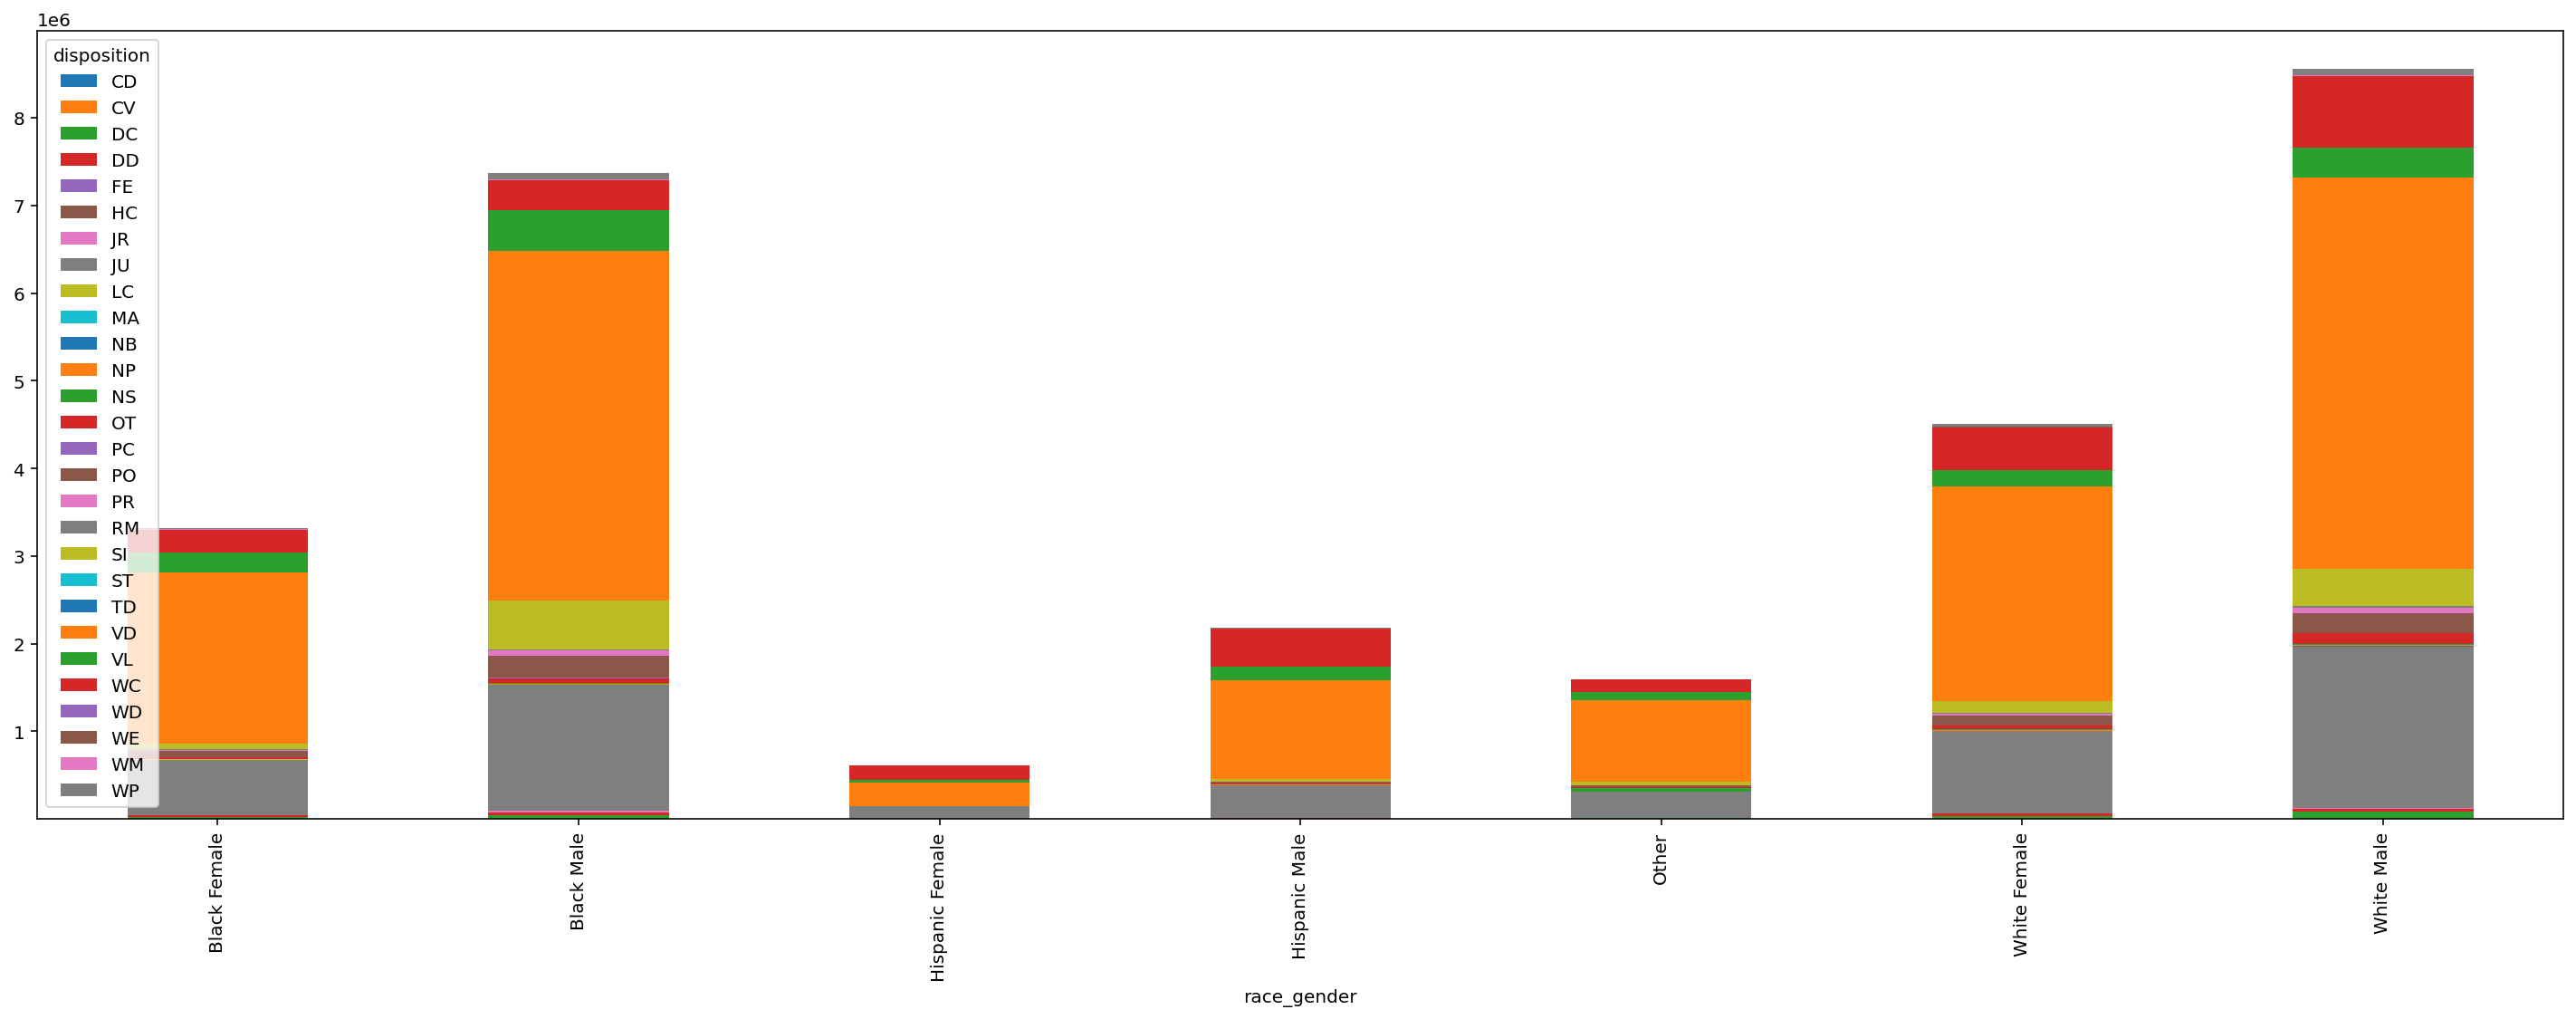

In [20]:
pivot_rgd.plot(kind="bar", stacked=True, figsize=(25, 8))


In [21]:
rgd.sample(10)


,race_gender,disposition,count
154,White Female,VL,183754
148,White Female,PO,110693
73,Hispanic Female,VD,271826
133,White Female,CD,116
150,White Female,RM,6851
120,Other,OT,11101
111,Other,FE,14
82,Hispanic Male,DC,5993
45,Black Male,SI,562714
18,Black Female,SI,70721
